In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import time

import warnings

warnings.filterwarnings(action="ignore")

pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 35)


In [5]:
#loading the dataset
data = pd.read_csv('HeartAttack_data1.csv')

In [6]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0,2.0,185.0,0.0,0.0,?,?,?,0
1,29,1,2,120.0,243.0,0,0.0,160.0,0.0,0.0,?,?,?,0
2,29,1,2,140.0,NaN,0,0.0,170.0,0.0,0.0,?,?,?,0
3,30,0,1,170.0,237.0,0,1.0,170.0,0.0,0.0,?,?,6,0
4,31,0,2,100.0,219.0,0,1.0,150.0,0.0,0.0,?,?,?,0
5,32,0,2,105.0,198.0,0,0.0,165.0,0.0,0.0,?,?,?,0
6,32,1,2,110.0,225.0,0,0.0,184.0,0.0,0.0,?,?,?,0
7,32,1,2,125.0,254.0,0,0.0,155.0,0.0,0.0,?,?,?,0
8,33,1,3,120.0,298.0,0,0.0,185.0,0.0,0.0,?,?,?,0
9,34,0,2,130.0,161.0,0,0.0,190.0,0.0,0.0,?,?,?,0


In [7]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,288,293.000000,293.000000,293.000000,294.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4,2,4,NaN
top,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,NaN,NaN,NaN,NaN,190,291,266,NaN
mean,47.826531,0.724490,2.982993,132.583618,250.848708,NaN,0.218430,139.129693,0.303754,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,NaN,0.460868,23.589749,0.460665,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,NaN,0.000000,82.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,NaN,0.000000,122.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,NaN,0.000000,140.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,NaN,0.000000,155.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000


In [8]:
data.shape

(294, 14)

In [9]:
#dropping columns due to lack of data
data = data.drop(columns=['slope', 'ca', 'thal'])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0,0.0,110.0,1.0,1.0,1


In [10]:
data.replace('?', np.nan,inplace=True)

In [11]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
num          0
dtype: int64

In [12]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num           int64
dtype: object

In [13]:
data.fillna(method='ffill', inplace=True)
data.isna().sum()

data.cp.unique()

array([2, 1, 3, 4], dtype=int64)

In [14]:
convert_dict = {'trestbps': 'int64', 
                'chol':'int64', 'fbs':'int64','restecg':'int64','thalach':'int64','exang':'int64'}  

In [15]:
data = data.astype(convert_dict) 
print(data.dtypes) 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object


In [16]:
print(data["num"].describe())
print(data["num"].unique())

count    294.000000
mean       0.360544
std        0.480977
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: num, dtype: float64
[0 1]


## Checking correlation between columns

In [17]:
print(data.corr()["num"].abs().sort_values(ascending=False))

num         1.000000
exang       0.577166
oldpeak     0.545700
cp          0.505864
thalach     0.329337
sex         0.272781
chol        0.228496
fbs         0.162869
age         0.159315
trestbps    0.138462
restecg     0.031988
Name: num, dtype: float64


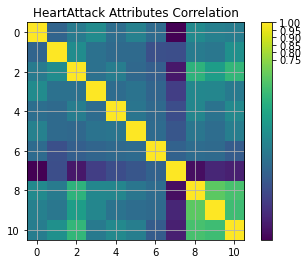

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(data.corr())
ax1.grid(True)
plt.title('HeartAttack Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])
plt.show()

(array([188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 106.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

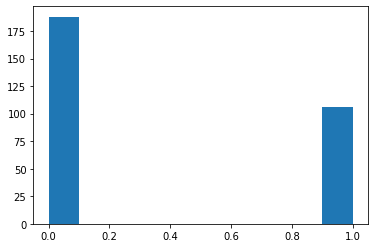

In [19]:
plt.hist(data['num'])

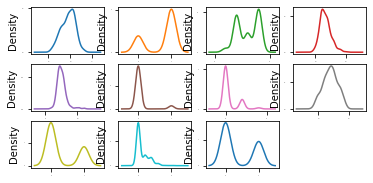

In [20]:
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, legend=False, fontsize=1)
plt.show()

In [21]:
Y = data['num'].values
X = data.drop('num', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=221)

In [22]:
models_list = [('CART', DecisionTreeClassifier()), ('SVM', SVC(kernel='linear')), ('NB', GaussianNB()),
               ('KNN', KNeighborsClassifier( n_neighbors=8)), ('RFC', RandomForestClassifier(n_estimators=500)),
               ('LR',LogisticRegression()),('LDA',LinearDiscriminantAnalysis()),
               ('SGD',SGDClassifier())]

In [23]:
num_folds = 10

results = []
names = []

In [26]:
for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=None)
    startTime = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    endTime = time.time()
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), endTime - startTime))

CART: 0.746053 (0.120118) (run time: 0.014959)
SVM: 0.811842 (0.090537) (run time: 5.483371)
NB: 0.806316 (0.062377) (run time: 0.011942)
KNN: 0.627632 (0.084590) (run time: 0.020944)
RFC: 0.827105 (0.113238) (run time: 5.849850)
LR: 0.821842 (0.099298) (run time: 0.165526)
LDA: 0.816842 (0.101507) (run time: 0.012965)
SGD: 0.526579 (0.131144) (run time: 0.018950)


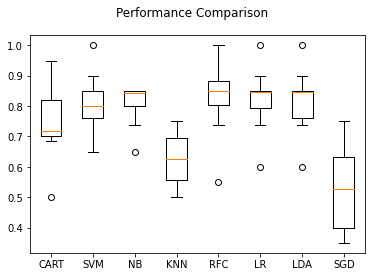

In [27]:
# Performance Comparision
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [28]:
# Standardize the dataset
pipelines = [('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])),
             ('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])),
             ('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])),
             ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
             ('ScaledRFC',Pipeline([('Scaler',StandardScaler()), ('RFC',RandomForestClassifier())])),
             ('ScaledLR',Pipeline([('Scaler',StandardScaler()), ('LR',LogisticRegression())])),
             ('ScaledLDA',Pipeline([('Scaler',StandardScaler()), ('LDA',LinearDiscriminantAnalysis())]))]                                        


In [29]:
results = []
names = []

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=None)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end - start))

ScaledCART: 0.735526 (0.105449) (run time: 0.023934)
ScaledSVM: 0.822105 (0.108216) (run time: 0.081783)
ScaledNB: 0.806316 (0.062377) (run time: 0.017166)
ScaledKNN: 0.822632 (0.095256) (run time: 0.025930)
ScaledRFC: 0.822105 (0.103232) (run time: 1.233700)
ScaledLR: 0.811842 (0.098473) (run time: 0.041892)
ScaledLDA: 0.816842 (0.101507) (run time: 0.022939)


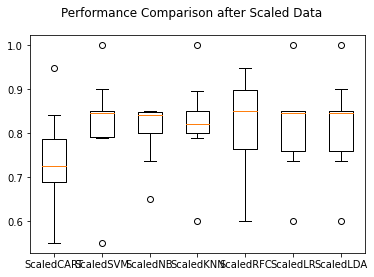

In [32]:
# Performance Comparison after Scaled Data
fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
model = GaussianNB()
start = time.time()
model.fit(X_train_scaled, Y_train)  # Training of algorithm
end = time.time()
print("\n\nGaussian Training Completed. It's Run Time: %f" % (end - start))



Gaussian Training Completed. It's Run Time: 0.000997


In [34]:
# estimate accuracy on test dataset
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
print("All predictions done successfully by GausianNB Machine Learning Algorithms")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))

print("\n\n")
print("confusion_matrix = \n")
print(confusion_matrix(Y_test, predictions))

All predictions done successfully by GausianNB Machine Learning Algorithms


Accuracy score 0.826531



confusion_matrix = 

[[57 10]
 [ 7 24]]


In [35]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        67
           1       0.71      0.77      0.74        31

    accuracy                           0.83        98
   macro avg       0.80      0.81      0.80        98
weighted avg       0.83      0.83      0.83        98



In [31]:
from sklearn.externals import joblib
joblib.dump(model,'Heart_model.pkl')

ML solution proposed by: Saumya Awasthi
Email Id: saumyaawasth049@gmail.com
Student Id(Order Id):375781


In [38]:
import joblib
joblib.dump(model,'heartattack-prediction-model.pkl')

['heartattack-prediction-model.pkl']